In [1]:
%matplotlib inline
import cv2
import imutils
import os
from matplotlib import pyplot as plt

def cv2_imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [2]:
os.chdir("sample-images")

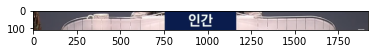

In [3]:
src = cv2.imread("sample1.png")
height, width, channels = src.shape
img = src[int(height*0.85):int(height*0.95)].copy()
cv2_imshow(img)

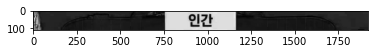

In [4]:
# Convert from BGR to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Get the saturation plane - all black/white/gray pixels are zero, and colored pixels are above zero.
s = hsv[:, :, 1]

cv2_imshow(s)

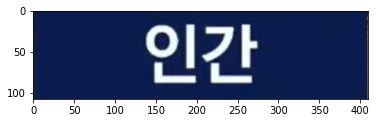

In [5]:
# Apply threshold on s - use automatic threshold algorithm (use THRESH_OTSU).
ret, thresh = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Find contours
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts) 

# Find the contour with the maximum area.
c = max(cnts, key=cv2.contourArea)

# Get bounding rectangle
x, y, w, h = cv2.boundingRect(c)

# Crop the bounding rectangle out of img
out = img[y:y+h, x:x+w, :].copy()

cv2_imshow(out)

In [6]:
# domient 색깔 감지
import numpy as np

colors, count = np.unique(out.reshape(-1,out.shape[-1]), axis=0, return_counts=True)
b, g, r = colors[count.argmax()]
r, g, b

(10, 28, 77)

In [7]:
# 파란색이면 성공
(r, g, b) == (10, 28, 77)

True

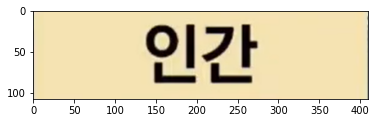

In [8]:
# Invert Image
out_i = cv2.bitwise_not(out)
cv2_imshow(out_i)

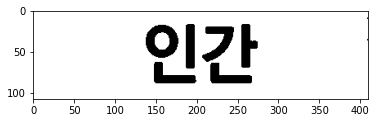

In [9]:
# 인식 가능하도록 흑/백 값으로 변환
# out_r = cv2.resize(out_i, None, fx=1.8, fy=1.8, interpolation=cv2.INTER_CUBIC+cv2.INTER_LINEAR)
out_g = cv2.cvtColor(out_i, cv2.COLOR_BGR2GRAY)
ret, out_th = cv2.threshold(out_g, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(out_th)

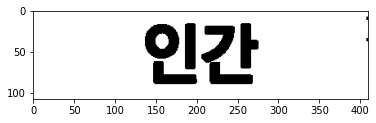

In [10]:
kernel = np.ones((3,3), np.uint8)
out_er = cv2.erode(out_th, kernel, iterations = 1)
out_erinv = out_er
cv2_imshow(out_erinv)

단어: '인간'


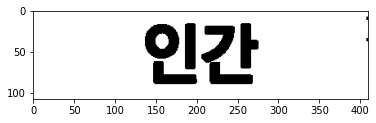

In [11]:
import pytesseract
# out_rgb = cv2.cvtColor(out_erinv, cv2.COLOR_BGR2RGB)
target_img = out_erinv
result = pytesseract.image_to_string(target_img, config="--psm 4", lang='kor')
print("단어: '%s'" % result.strip())
cv2_imshow(target_img)